<a href="https://colab.research.google.com/github/arofenitra/Numerical-Linear-Algebra/blob/main/matrix_operation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sp

### Matrix addition and multiplication and multiplication by scalar

If $A=(a_{ij})_{n\times n} , B=(a_{ij})_{n\times n} , \lambda \in \mathbb{C}$ then : $A+B=(a_{ij}+b_{ij})_{n\times n}$ , $A \cdot B=\left(\sum_{k=1}^n{a_{ik}b_{kj}} \right)_{n \times n}$ and $\lambda A=(\lambda a_{ij})_{n \times n}$

In [65]:
#we will take A and B as square matrix
def naive_matrix_addition(A,B): #complexity O(n^2)
  n=len(A)
  A=np.array(A)
  B=np.array(B)
  C=np.zeros_like(A)
  for i in range(n):
      for j in range(n):
        C[i,j]=A[i,j]+B[i,j]
  return C

def naive_matrix_multiplication_scalar(A,a): #complexity O(n^2)
  n=len(A)
  A=np.array(A)
  C=np.zeros_like(A)
  for i in range(n):
      for j in range(n):
        C[i,j]=a*A[i,j]
  return C

def naive_matrix_multiplication(A,B): #complexity O(n^3)
  n=len(A)

  if len(A)!=len(B):
    raise ValueError("matrix with different size cannot be muliplied")
  A=np.array(A)
  B=np.array(B)
  C=np.zeros_like(A)
  for i in range(n):
      for j in range(n):
        for k in range(n):

          C[i,j]+=A[i,k]*B[k,j]
  return C





In [66]:
#numba addition
from numba import jit,prange #jit=just in time compiler
@jit(nopython=True, parallel=True)
def numba_matrix_addition(A,B): #complexity O(n^2)
  n=len(A)
  C=np.zeros_like(A)
  if n==len(B):
    for i in prange(n):
      for j in range(n):
        C[i][j]=A[i][j]+B[i][j]
    return C
  else:
    raise ValueError("matrix with different size cannot be added")

def numba_matrix_multiplication_scalar(A,a): #complexity O(n^2)
  n=len(A)
  C=np.zeros_like(A)
  for i in prange(n):
    for j in range(n):
      C[i][j]=a*A[i][j]
  return C

def numba_matrix_multiplication(A,B): #complexity O(n^3)
  n=len(A)

  if len(A)!=len(B):
    raise ValueError("matrix with different size cannot be muliplied")
  A=np.array(A)
  B=np.array(B)
  C=np.zeros_like(A)
  for i in prange(n):
      for j in range(n):
        for k in range(n):

          C[i,j]+=A[i,k]*B[k,j]
  return C

In [67]:
n=3
[[1/(i+j+1) for j in range(n)]for i in range(n)] #hilbert matrix
A=np.array(A)
a=2
print("A= ",A)
print("2A= ",2*A)
print("A^2= ",A@A)


A=  [[0.9804448  0.69886682 0.14922943 ... 0.11180801 0.98722866 0.29299371]
 [0.77894997 0.43393303 0.81788981 ... 0.40016133 0.92569596 0.62723083]
 [0.19707749 0.7666597  0.22281423 ... 0.12372805 0.31040539 0.67111628]
 ...
 [0.43505156 0.20355612 0.59814733 ... 0.87300243 0.56594257 0.92499369]
 [0.38431515 0.09680629 0.19345236 ... 0.85126889 0.26135137 0.94918648]
 [0.3090339  0.08207245 0.14631819 ... 0.56314086 0.15428867 0.01044875]]
2A=  [[1.96088959 1.39773363 0.29845886 ... 0.22361602 1.97445731 0.58598742]
 [1.55789994 0.86786606 1.63577962 ... 0.80032267 1.85139193 1.25446166]
 [0.39415498 1.53331941 0.44562847 ... 0.2474561  0.62081077 1.34223256]
 ...
 [0.87010313 0.40711224 1.19629467 ... 1.74600486 1.13188514 1.84998738]
 [0.7686303  0.19361258 0.38690472 ... 1.70253778 0.52270274 1.89837295]
 [0.61806781 0.16414491 0.29263639 ... 1.12628173 0.30857735 0.0208975 ]]
A^2=  [[17.4618273  19.85085058 18.40660343 ... 19.35019592 20.04235246
  18.63142665]
 [17.87628976 20

plotting the result of numpy VS numba (naive) VS non numba in addition and multiplication

In [89]:

#plot the time of execution of numpy and the naive addition, multiplication
time_naive=[]
time_numpy=[]
time_naive_mul=[]
time_numpy_mul=[]
time_numba_add=[]
time_numba_mul=[]
n=32
for i in range(n):
  A=np.random.rand(n,n)
  B=np.random.randn(n,n)
  start1=time.time()
  naive_matrix_addition(A,B)

  time_naive.append(time.time()-start1)

  start2=time.time()
  A+B
  time_numpy.append(time.time()-start2)

  start3=time.time()
  naive_matrix_multiplication(A,B)
  time_naive_mul.append(time.time()-start3)

  start4=time.time()
  np.dot(A,B)
  time_numpy_mul.append(time.time()-start4)

  start5=time.time()
  numba_matrix_addition(A,B)
  time_numba_add.append(time.time()-start4)

  start6=time.time()
  numba_matrix_multiplication(A,B)
  time_numba_mul.append(time.time()-start4)



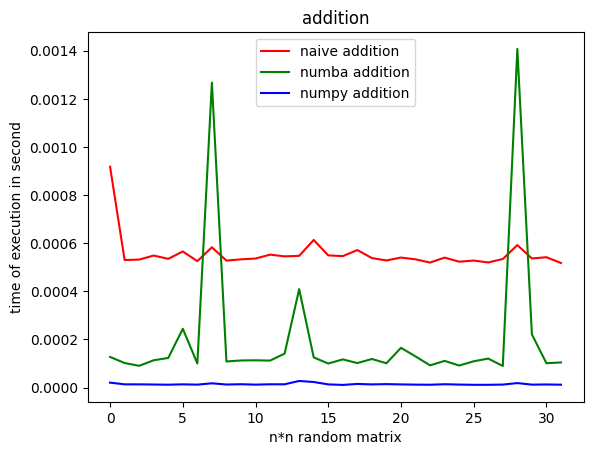

average time of execution of naive addition :  0.0005549788475036621
average time of execution of numba addition :  0.0002055838704109192
average time of execution of numpy addition :  1.4357268810272217e-05


In [90]:

plt.plot(time_naive,"-r",label="naive addition")
plt.plot(time_numba_add,"-g",label="numba addition")
plt.plot(time_numpy,"-b",label="numpy addition")

plt.title("addition")
plt.ylabel("time of execution in second")
plt.xlabel("n*n random matrix")
plt.legend()

plt.show()
print("average time of execution of naive addition : ",np.sum(time_naive)/n)
print("average time of execution of numba addition : ",np.sum(time_numba_add)/n)
print("average time of execution of numpy addition : ",np.sum(time_numpy)/n)


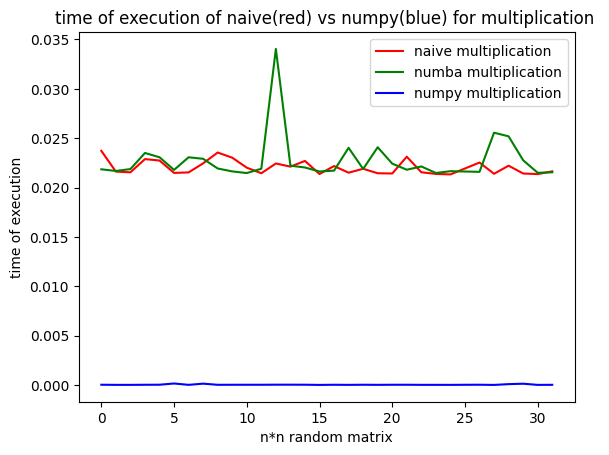

average time of execution of naive multiplication :  0.02203194797039032
average time of execution of numba multiplication :  0.02273770421743393
average time of execution of numpy multiplication :  4.9583613872528076e-05


In [91]:
plt.title("time of execution of naive(red) vs numpy(blue) for multiplication ")
plt.plot(time_naive_mul,"-r",label="naive multiplication")
plt.plot(time_numba_mul,"-g",label="numba multiplication")
plt.plot(time_numpy_mul,"-b",label="numpy multiplication")
plt.ylabel("time of execution")
plt.xlabel("n*n random matrix")
plt.legend()
plt.show()
print("average time of execution of naive multiplication : ",np.sum(time_naive_mul)/n)
print("average time of execution of numba multiplication : ",np.sum(time_numba_mul)/n)
print("average time of execution of numpy multiplication : ",np.sum(time_numpy_mul)/n)

### Gaussian elimination, LU Factorization

If we have a $n \cdot n $ matrix $A=(a_{ij})_{n \cdot }$ and a identity matrix $I_n$

$$A|I_n= \left(\begin{matrix} a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\ a_{21} & a_{22} & a_{23} & \cdots & a_{2n} \\ a_{31} & a_{32} & a_{33} & \cdots & a_{3n} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\a_{n1} & a_{n2} & a_{n3} & \cdots & a_{nn}\\   \end{matrix} \right|
\left| \begin{matrix} 1 & 0 & 0 & \cdots & 0 \\ 0 & 1 & 0 & \cdots & 0 \\ 0 & 0& 1 & \cdots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\0 & 0 & 0 & \cdots & 1\\   \end{matrix} \right)$$

For $a_{11}\neq 0$, a pivot element, and $R_1$ the pivot row, we can have : $R_2 \leftarrow R_2 -\frac{a_{21}}{a_{11}}R_1$,...,$R_n \leftarrow R_n -\frac{a_{n1}}{a_{11}}R_1$ where $R_i$ is the ith row.

$$ \left(\begin{matrix} a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\ 0 & a_{22}-a_{21}\frac{a_{12}}{a_{11}} & a_{23}-a_{21}\frac{a_{13}}{a_{11}} & \cdots & a_{2n}-a_{21}\frac{a_{1n}}{a_{11}} \\  0 & a_{32}-a_{31}\frac{a_{12}}{a_{11}} & a_{33}-a_{31}\frac{a_{13}}{a_{11}} & \cdots & a_{3n}-a_{31}\frac{a_{1n}}{a_{11}} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 0 & a_{n2}-a_{n1}\frac{a_{12}}{a_{11}} & a_{n3}-a_{n1}\frac{a_{13}}{a_{11}} & \cdots & a_{nn}-a_{n1}\frac{a_{1n}}{a_{11}}\\   \end{matrix} \right|
\left| \begin{matrix} 1 & 0 & 0 & \cdots & 0 \\ -\frac{a_{12}}{a_{11}} & 1 & 0 & \cdots & 0 \\ -\frac{a_{13}}{a_{11}} & 0& 1 & \cdots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\-\frac{a_{1n}}{a_{11}} & 0 & 0 & \cdots & 1\\   \end{matrix} \right)$$


If $R_i$ is the row pivot with $a_{jj}\neq 0$, the pivot element, then for $i<j$: the operation $R_i \leftarrow R_i -$ can be expressed as :
$$ E_{ji}A=(a'_{kl})_{n \cdot n}, \; a'_{kl}=a_{kl} \; \forall k\neq j; a'_{jl}=a_{jl}-\frac{a_{ji}}{a_{ii}}a_{il} $$
$\Rightarrow E_{ji}=(a'_{kl}), \; a'_{kk}=1, a'_{ji}=-\frac{a_{ji}}{a_{ii}}$ and otherwise : $a'_{kl}=0$ (its form can be visualise easily similar in form of the RHS of the above matrix).  
Its inverse is $E_{ji}^{-1}=(a'_{kl}), \; a'_{kk}=1, a'_{ji}=\frac{a_{ji}}{a_{ii}}$ and otherwise : $a'_{kl}=0$ .  
Its determinant is 1, $\det(E_{ji})=\det(E_{ji}^{-1})=1$.

$$E_{n,n-1}...E_{n1}...E_{21}A=U ⇒A=\left(\displaystyle \prod_{i=1}^n\prod_{j=i+1}^nE_{ji}^{-1}\right)U=LU $$

In some case where $a_{ii}=0$, then the $LU$ factorization fails. But we can do $PLU$ factorization by permuting it to the other $a_{il}\neq 0$ if such $a_{il}$ exists. Otherwise if such  $a_{il}$ does not exist, the system is singular, not invertible, has determinant 0 and has rank $r<n$.
.


Continuing so on, we can have a triangular matrix. And doing the similar transform but begin from the bottom, we can have the $LU$ decomposition of $A$ for non singular matrix $A$.  
$A=LU$

In [ ]:
import numpy as np

In [ ]:
def LU_factorization(A):
  n=len(A)
  I=np.eye(n)
  L=np.eye(n)

  for i in range(n):
    if A[i,i]==0:
      raise ValueError("LU factorization failed")

    for j in range(i+1,n):
      A[j,:],I[j,:]=A[j,:]-A[j,i]/A[i,i]*A[i,:],I[j,:]-A[j,i]/A[i,i]*I[i,:] #gaussian elimination
      L[j,i]=-I[j,i] #L is the inverse of I
  return L,A
def PLU_factorization(A):
  n=len(A)
  I=np.eye(n)
  L=np.eye(n)
  P=np.eye(n)
  for i in range(n):
    if A[i,i]!=0:
      for j in range(i+1,n):
        A[j,:],I[j,:]=A[j,:]-A[j,i]/A[i,i]*A[i,:],I[j,:]-A[j,i]/A[i,i]*I[i,:] #gaussian elimination
        L[j,i]=-I[j,i] #L is the inverse of I
    elif A[i,i]==0:
      for j in range(i+1,n):
        if A[j,i]!=0:
          A[j,:],A[i,:]=A[i,:],A[j,:]
          P[j,:],P[i,:]=P[i,:],P[j,:]



  return P,L,A

[[ 1.00000000e+00 -2.00000000e+00  3.00000000e+00]
 [ 2.00000000e+00  3.00000000e+00  4.00000000e+00]
 [-4.00000000e+00  4.44089210e-16  2.85714286e-01]]


In [ ]:
L=np.array([[ 1.,  0.,  0.],
       [ 2.,  1.,  0.],
       [-4., -8.,  1.]])
U=np.array([[ 1,  2,  3],
       [ 0, -1, -2],
       [ 0,  0, -3]])
print(np.matmul(L,U))

[[ 1.  2.  3.]
 [ 2.  3.  4.]
 [-4.  0.  1.]]
